In [1]:
#Import modules
import numpy as np
import matplotlib
matplotlib.rcParams['font.size'] = 16
import matplotlib.pyplot as plt

# Problem 3.1

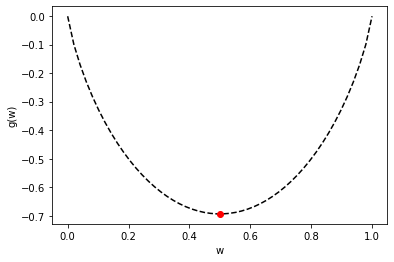

In [2]:
#Part A
xs = np.linspace(0.0001, 0.9999)

plt.plot(xs, xs * np.log(xs) + (1 - xs) * np.log(1 - xs), 'k--')
plt.plot(0.5, np.log(0.5), 'ro')
plt.xlabel("w")
plt.ylabel("g(w)")
plt.show()

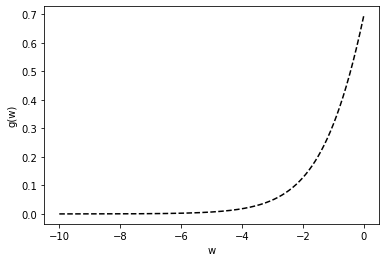

In [3]:
#Part B: Minimum is at -infinity
xs = np.linspace(-10, 0, num=10000)

plt.plot(xs, np.log(1 + np.exp(xs)), 'k--')
plt.xlabel("w")
plt.ylabel("g(w)")
plt.show()

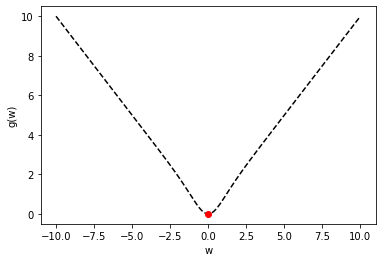

In [4]:
#Part C
xs = np.linspace(-10, 10, num=10000)

plt.plot(xs, xs * np.tanh(xs), 'k--')
plt.plot(0, 0, 'ro')
plt.xlabel("w")
plt.ylabel("g(w)")
plt.show()

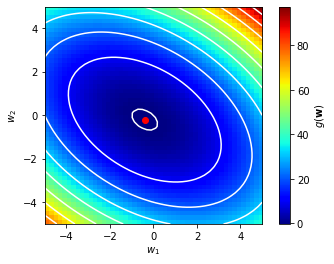

In [5]:
#Part D
def g(x, y):
    C = np.matrix('2 1; 1 3')
    w = np.matrix([[x], [y]])
    b = np.matrix('1; 1')
    return np.sum(0.5 * w.T*C*w + b.T * w)

xs, ys = np.linspace(-5.0, 5.0), np.linspace(-5.0, 5.0)
xm, ym = np.meshgrid(xs, ys)

gs = np.zeros((xs.size, xs.size))
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        gs[j, i] = g(x, y)
        
plt.imshow(gs, origin='lower', cmap='jet', extent=[-5.0, 5.0, -5.0, 5.0])
cbar = plt.colorbar()
plt.contour(xm, ym, gs, levels=10, colors='white')
cbar.set_label("$g(\\mathbf{w})$")
plt.plot(-2/5, -1/5, 'ro')
plt.xlabel("$w_1$")
plt.ylabel("$w_2$")
plt.show()

# Problem 3.5

Text(0.5, 0.01, 'k')

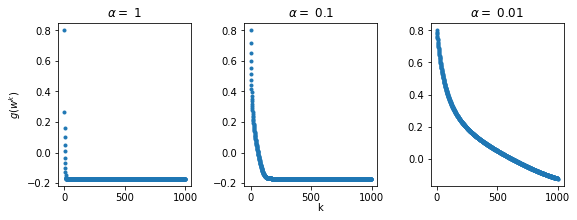

In [6]:
def g(w):
    return (w**4.0 + w**2.0 + 10 * w) / 50.0

def grad_g(w):
    return (4 * w**3.0 + 2 * w + 10) / 50.0

def grad_descent(w0, alpha, n_iter):
    ws = np.array([])
    for i in range(n_iter):
        ws = np.append(ws, w0)
        w0 = w0 - alpha * grad_g(w0)
    return ws

fig, ax = plt.subplots(1, 3, figsize=(9, 3))
ax[0].plot(np.arange(1000), g(grad_descent(2, 1, 1000)), '.')
ax[0].set_ylabel("$g(w^k)$")
ax[0].set_title("$\\alpha = $ 1")

ax[1].plot(np.arange(1000), g(grad_descent(2, 0.1, 1000)), '.')
ax[1].set_title("$\\alpha = $ 0.1")

ax[2].plot(np.arange(1000), g(grad_descent(2, 0.01, 1000)), '.')
ax[2].set_title("$\\alpha = $ 0.01")

plt.subplots_adjust(left=0.1, right=0.88, wspace=0.4)
fig.text(0.5, 0.01, "k")

# Problem 3.6

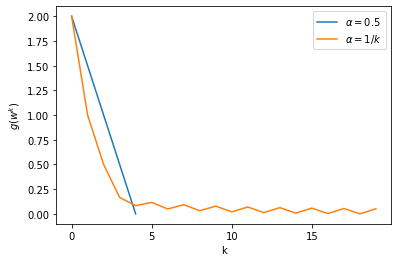

In [7]:
def g(w):
    return np.abs(w)

def grad_g(w):
    if w < 0:
        return -1.0
    elif w > 0:
        return 1.0
    else:
        return np.nan #Stop if we hit a non-differentiable point
    
# Diminshing step length
def grad_descent_diminish(w0, n_iter):
    ws = []
    for i in range(1, n_iter+1):
        ws.append(w0)
        w0 = w0 - (1 / i) * grad_g(w0)
    return ws

def grad_descent(w0, alpha, n_iter):
    ws = []
    for i in range(n_iter):
        ws.append(w0)
        w0 = w0 - alpha * grad_g(w0)
    return ws

plt.plot(g(grad_descent(2.0, 0.5, 20)), label="$\\alpha = 0.5$")
plt.plot(g(grad_descent_diminish(2, 20)), label="$\\alpha = 1/k$")
plt.xlabel("k")
plt.ylabel("$g(w^k)$")
plt.xticks(np.arange(0, 20, 5))
plt.legend()

# Problem 3.8

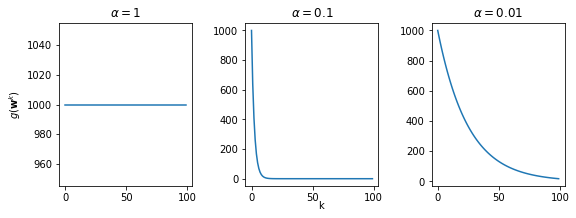

In [8]:
def g(w):
    return np.sum(w**2.0)

def grad_w(w):
    return 2 * w

def grad_descent(w0, alpha, n_iter):
    ws = []
    for i in range(n_iter):
        ws.append(g(w0))
        w0 = w0 - alpha * grad_w(w0)
    return ws

fig, ax = plt.subplots(1, 3, figsize=(9, 3))
ax[0].plot(grad_descent(10*np.ones((10, 1)), 1.0, 100))
ax[0].set_ylabel("$g(\\mathbf{w}^k)$")
ax[0].set_title("$\\alpha = 1$")

ax[1].plot(grad_descent(10*np.ones((10, 1)), 0.1, 100))
ax[1].set_title("$\\alpha = 0.1$")

ax[2].plot(grad_descent(10*np.ones((10, 1)), 0.01, 100))
ax[2].set_title("$\\alpha = 0.01$")

fig.text(0.5, 0.02, "k")

plt.subplots_adjust(left=0.1, right=0.88, wspace=0.4)